Data Project - Stock Market Analysis

In this portifolio project, we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock imformation, visualize different aspects of it, and finally we will look at a few days of analyzing the risk of a stock, based on it previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:
1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

Basic Analysis of Stock Information
In this section, we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader.data as web
from datetime import datetime

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
for stock in tech_list:

        globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,202.299447,198.649526,200.363320,200.611265,2.922233e+07,199.215282
std,30.528621,30.611228,30.550025,30.686687,1.219796e+07,31.309527
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,177.919998,174.520004,175.600006,175.529999,2.100510e+07,173.885300
50%,201.399994,198.440002,199.679993,200.020004,2.619210e+07,198.447952
75%,218.029999,211.710007,214.839996,214.169998,3.375100e+07,213.528931
max,271.000000,267.510010,267.899994,270.709991,9.574460e+07,270.709991


In [8]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-06,174.779999,170.419998,171.759995,174.720001,43098400.0,172.133682
2018-12-07,174.490005,168.300003,173.490005,168.490005,42281600.0,165.995926
2018-12-10,170.089996,163.330002,165.000000,169.600006,62026000.0,167.089478
2018-12-11,171.789993,167.000000,171.660004,168.630005,47281700.0,166.133850
2018-12-12,171.919998,169.020004,170.399994,169.100006,35627700.0,166.596878
...,...,...,...,...,...,...
2019-12-02,268.250000,263.450012,267.269989,264.160004,23621800.0,264.160004
2019-12-03,259.529999,256.290009,258.309998,259.450012,28607600.0,259.450012
2019-12-04,263.309998,260.679993,261.070007,261.739990,16795400.0,261.739990


In [9]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-06,174.779999,170.419998,171.759995,174.720001,43098400.0,172.133682
2018-12-07,174.490005,168.300003,173.490005,168.490005,42281600.0,165.995926
2018-12-10,170.089996,163.330002,165.000000,169.600006,62026000.0,167.089478
2018-12-11,171.789993,167.000000,171.660004,168.630005,47281700.0,166.133850
2018-12-12,171.919998,169.020004,170.399994,169.100006,35627700.0,166.596878


In [10]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-06,174.779999,170.419998,171.759995,174.720001,43098400.0,172.133682
2018-12-07,174.490005,168.300003,173.490005,168.490005,42281600.0,165.995926
2018-12-10,170.089996,163.330002,165.000000,169.600006,62026000.0,167.089478
2018-12-11,171.789993,167.000000,171.660004,168.630005,47281700.0,166.133850
2018-12-12,171.919998,169.020004,170.399994,169.100006,35627700.0,166.596878
...,...,...,...,...,...,...
2019-12-02,268.250000,263.450012,267.269989,264.160004,23621800.0,264.160004
2019-12-03,259.529999,256.290009,258.309998,259.450012,28607600.0,259.450012
2019-12-04,263.309998,260.679993,261.070007,261.739990,16795400.0,261.739990


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-12-06 to 2019-12-06
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


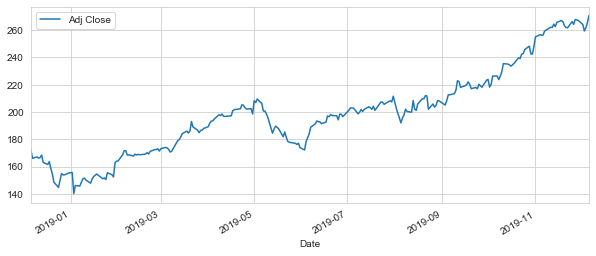

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

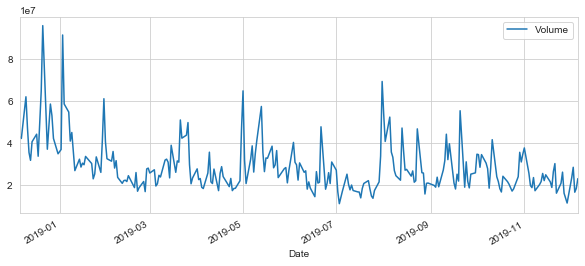

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [14]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-12-06 to 2019-12-06
Data columns (total 9 columns):
High              253 non-null float64
Low               253 non-null float64
Open              253 non-null float64
Close             253 non-null float64
Volume            253 non-null float64
Adj Close         253 non-null float64
MA for 10 days    244 non-null float64
MA for 20 days    234 non-null float64
MA for 50 days    204 non-null float64
dtypes: float64(9)
memory usage: 19.8 KB


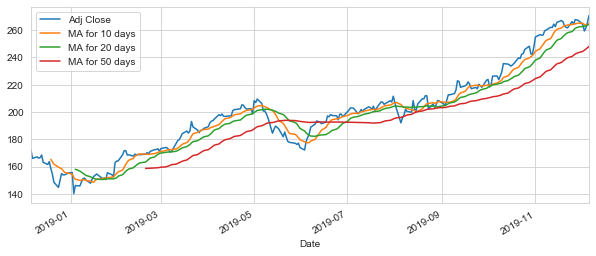

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

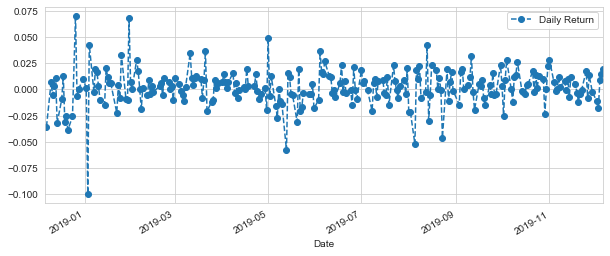

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,Linestyle='--',marker='o')

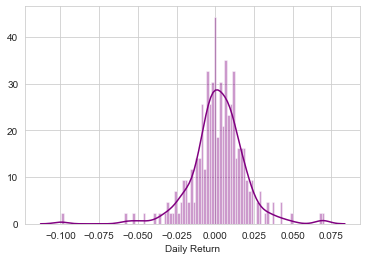

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

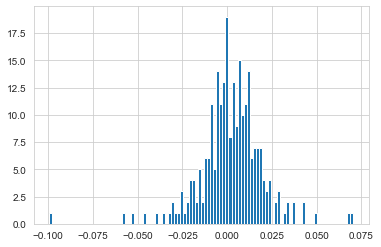

In [19]:
#both work, same as the above one
AAPL['Daily Return'].hist(bins=100)

In [20]:
closing_df=web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [21]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-12-06,172.133682,1068.729980,107.599037,1699.189941
2018-12-07,165.995926,1036.579956,103.292702,1629.130005
2018-12-10,167.089478,1039.550049,106.022339,1641.030029
2018-12-11,166.133850,1051.750000,107.007774,1643.239990
2018-12-12,166.596878,1063.680054,107.490639,1663.540039


In [22]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-12-06,NaN,NaN,NaN,NaN
2018-12-07,-0.035657,-0.030082,-0.040022,-0.041231
2018-12-10,0.006588,0.002865,0.026426,0.007305
2018-12-11,-0.005719,0.011736,0.009295,0.001347
2018-12-12,0.002787,0.011343,0.004512,0.012354


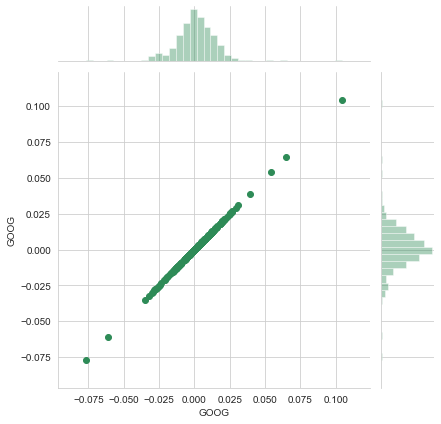

In [23]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

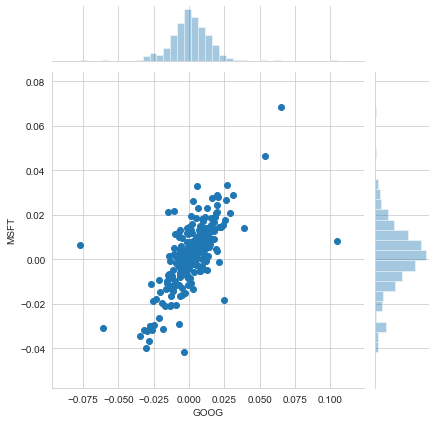

In [24]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [25]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_example2.svg')

<IPython.core.display.SVG object>

In [26]:
tech_rets.head()
#daily return percentage change

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-12-06,NaN,NaN,NaN,NaN
2018-12-07,-0.035657,-0.030082,-0.040022,-0.041231
2018-12-10,0.006588,0.002865,0.026426,0.007305
2018-12-11,-0.005719,0.011736,0.009295,0.001347
2018-12-12,0.002787,0.011343,0.004512,0.012354


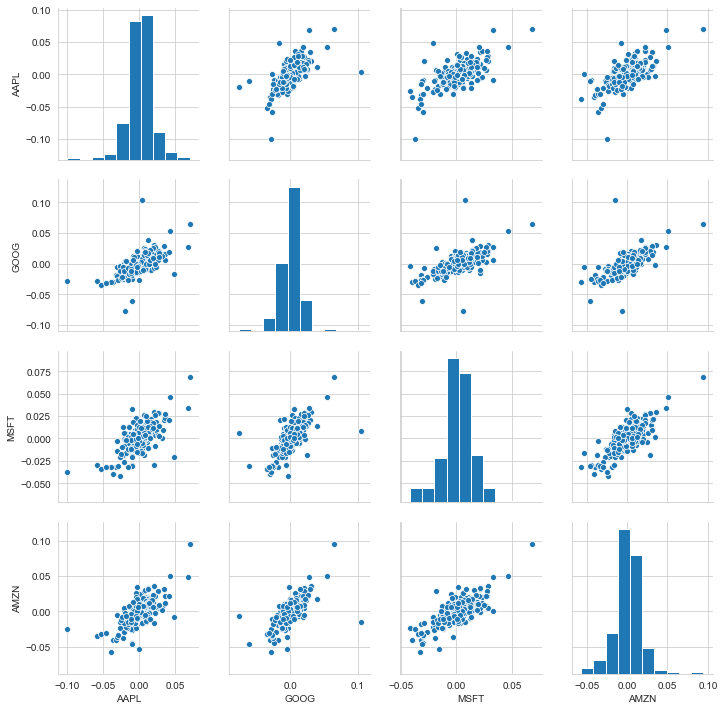

In [27]:
sns.pairplot(tech_rets.dropna())

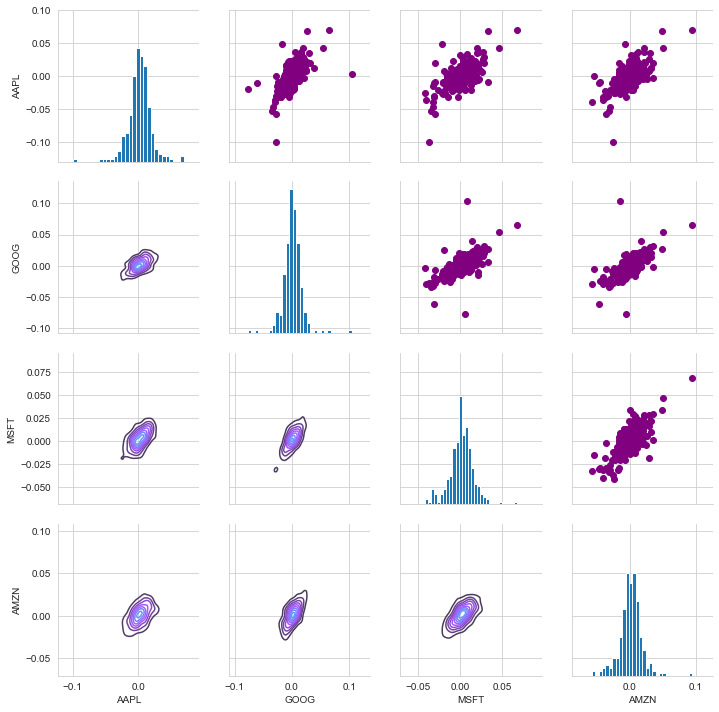

In [28]:
returns_fig = sns.PairGrid(tech_rets.dropna())
#map the upper right triangle
returns_fig.map_upper(plt.scatter,color='purple')
#map the lower triangle of the figure, cmap is the color map
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
#map the diagonal of the figure
returns_fig.map_diag(plt.hist,bins=30)

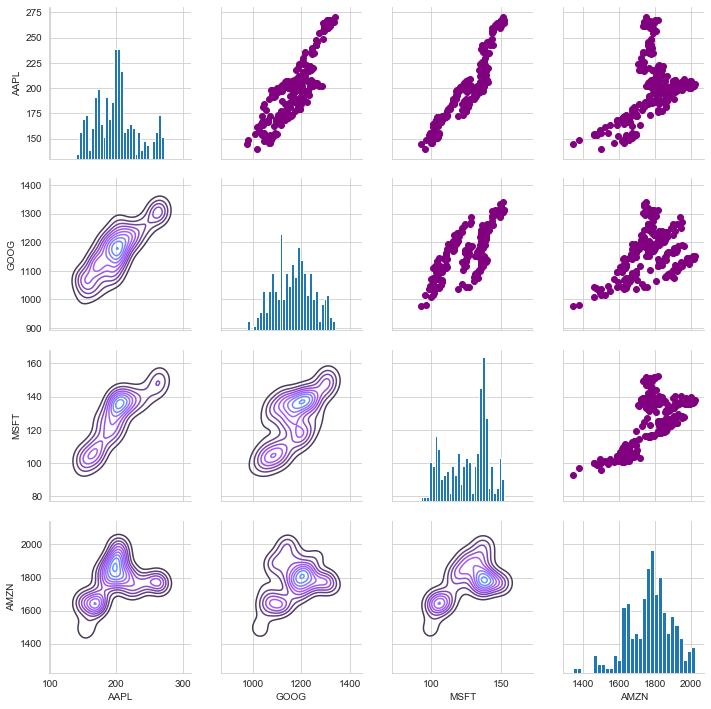

In [29]:
returns_fig = sns.PairGrid(closing_df)
#map the upper right triangle
returns_fig.map_upper(plt.scatter,color='purple')
#map the lower triangle of the figure, cmap is the color map
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
#map the diagonal of the figure
returns_fig.map_diag(plt.hist,bins=30)

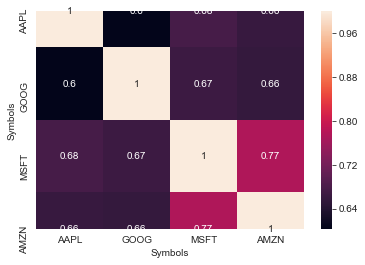

In [30]:
#correlation plot
#annot is annotation
sns.heatmap(tech_rets.dropna().corr(),annot=True)

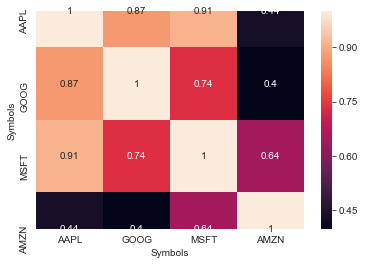

In [31]:
sns.heatmap(closing_df.corr(),annot=True)

Risk Analysis
There are many ways to quantify risk, one of the most basic ways using the information we've gathered on daily pecentage returns is by comparing the expected return with the standard deviation of the daily return.

In [32]:
rets = tech_rets.dropna()

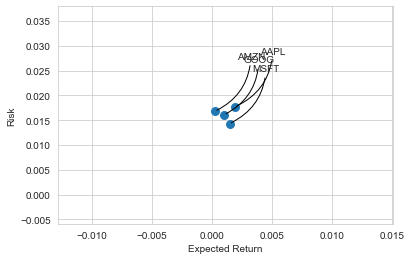

In [39]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext=(50,50),
        textcoords = 'offset points',ha = 'right', va='bottom',
        arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3',color='k'))

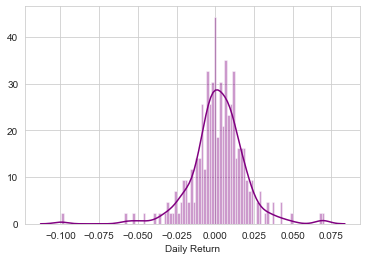

In [40]:
# Note the use of dropna()here, otherwise the NaN values can't ne ready by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [41]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-12-07,-0.035657,-0.030082,-0.040022,-0.041231
2018-12-10,0.006588,0.002865,0.026426,0.007305
2018-12-11,-0.005719,0.011736,0.009295,0.001347
2018-12-12,0.002787,0.011343,0.004512,0.012354
2018-12-13,0.010940,-0.001673,0.003392,-0.003102


Now we can use quantile to get the risk for the stock

In [42]:
rets['AAPL'].quantile(0.05)

-0.02514294077406115

The 0.05 empirical quantile of daily returns if at -0.019, that means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR (Value at Risk) is 0.019*1000000 = 19000.
Go ahead and repeat this for the other stocks in out portfolio, then afterwards we're gonna look at risk by implementing a Monte Carlo method

Value at Risk using Monte Carlo Method
Using the Monte Carlo to run many trials with random market confditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregations of all these simulations to establish how risky the stock is.
A brief explannation of what we're going to do:
We'll use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous prioce of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt‾‾‾√
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt‾‾‾√)
 

where:
S=the stock price
ΔS=the change in stock price
μ=the expected return
σ=the standard deviation of returns
ϵ=the random variable
Δt=the elapsed time period

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [47]:
#set up the time horizon
days = 365
#Now our delta
dt = 1/days
#Grab the mu ()drift from the expected return data we got for AAPL
mu = rets.mean()['GOOG']
#Now grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [57]:
def stock_monte_carlo (start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [58]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-06,1071.199951,1030.770020,1034.260010,1068.729980,2769200,1068.729980
2018-12-07,1075.260010,1028.500000,1060.010010,1036.579956,2101200,1036.579956
2018-12-10,1048.449951,1023.289978,1035.050049,1039.550049,1807700,1039.550049
2018-12-11,1060.599976,1039.839966,1056.489990,1051.750000,1394700,1051.750000
2018-12-12,1081.650024,1062.790039,1068.000000,1063.680054,1523800,1063.680054


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

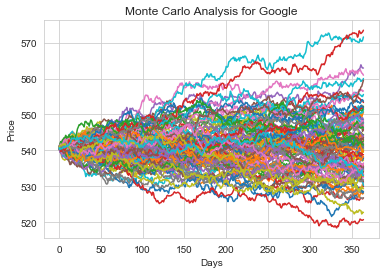

In [61]:
start_price = 540.74
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [65]:
runs = 100
simulations = np.zeros(runs)
for run in range(runs):
    simulations [run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]#gonna be the previous day end

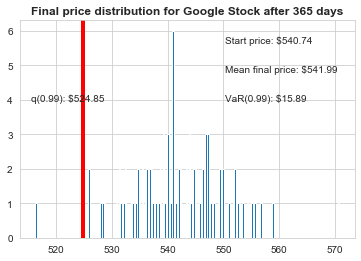

In [67]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');


    Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be VaR(0.99) for every investment of Start price (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $15.89 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.